In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv(r"D:\Datasets\SpaceShip\train.csv")
test_data = pd.read_csv(r"D:\Datasets\SpaceShip\test.csv")
sample = pd.read_csv(r"D:\Datasets\SpaceShip\sample_submission.csv")

In [3]:
train_data.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [4]:
# df_test.head(3)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
train_data.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

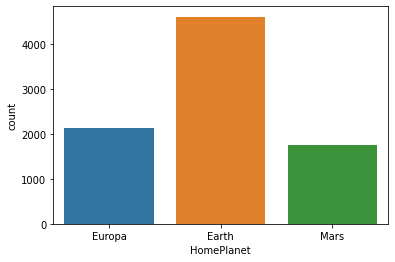

In [8]:
sns.countplot(x = train_data.HomePlanet)

In [9]:
train_data.HomePlanet.fillna('Earth', inplace = True)

In [10]:
test_data.HomePlanet.fillna(test_data.HomePlanet.mode().iloc[0], inplace = True)

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

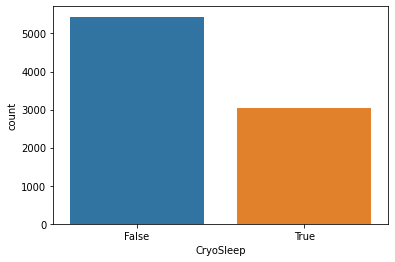

In [11]:
sns.countplot(x = train_data.CryoSleep)

In [12]:
train_data.CryoSleep.fillna(False, inplace = True)
test_data.CryoSleep.fillna(test_data.CryoSleep.mode().iloc[0], inplace = True)

<AxesSubplot:xlabel='VIP', ylabel='count'>

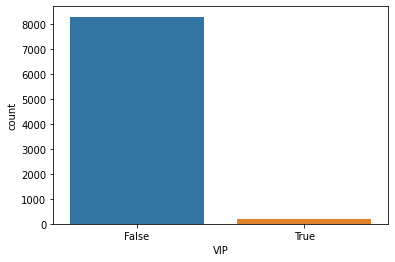

In [13]:
sns.countplot(x = train_data.VIP)

In [14]:
train_data.VIP.fillna(False, inplace =True)
test_data.VIP.fillna(test_data.VIP.mode().iloc[0], inplace =True)

In [15]:
train_data.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [16]:
train_data.Destination.fillna(train_data.Destination.mode().iloc[0], inplace =True)
test_data.Destination.fillna(test_data.Destination.mode().iloc[0], inplace =True)

In [17]:
train_data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [18]:
test_data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

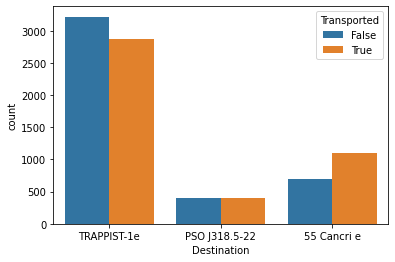

In [19]:
sns.countplot(data=train_data, x='Destination', hue='Transported')

<AxesSubplot:xlabel='VIP', ylabel='count'>

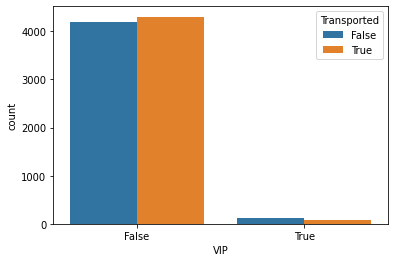

In [20]:
sns.countplot(data=train_data, x='VIP', hue='Transported')

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

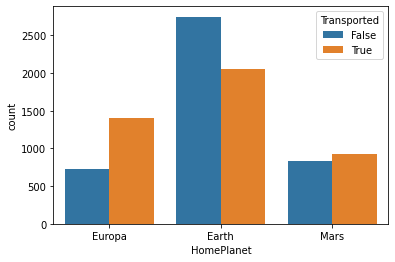

In [21]:
sns.countplot(data=train_data, x='HomePlanet', hue='Transported')

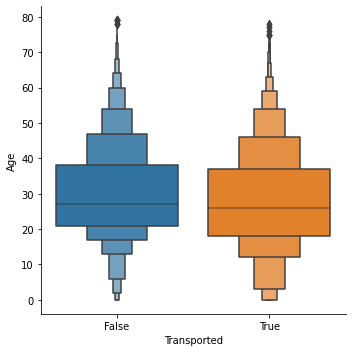

In [22]:
sns.catplot(data=train_data, x='Transported', y='Age', kind ='boxen')

In [23]:
train_data['total_expenses'] = train_data['FoodCourt'] + train_data['RoomService'] + train_data['Spa'] + train_data['ShoppingMall'] + train_data['VRDeck']
test_data['total_expenses'] = train_data['FoodCourt'] + train_data['RoomService'] + train_data['Spa'] + train_data['ShoppingMall'] + train_data['VRDeck']

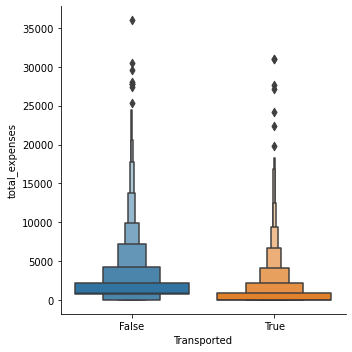

In [24]:
sns.catplot(data=train_data, x='Transported', y='total_expenses', kind ='boxen')

<AxesSubplot:>

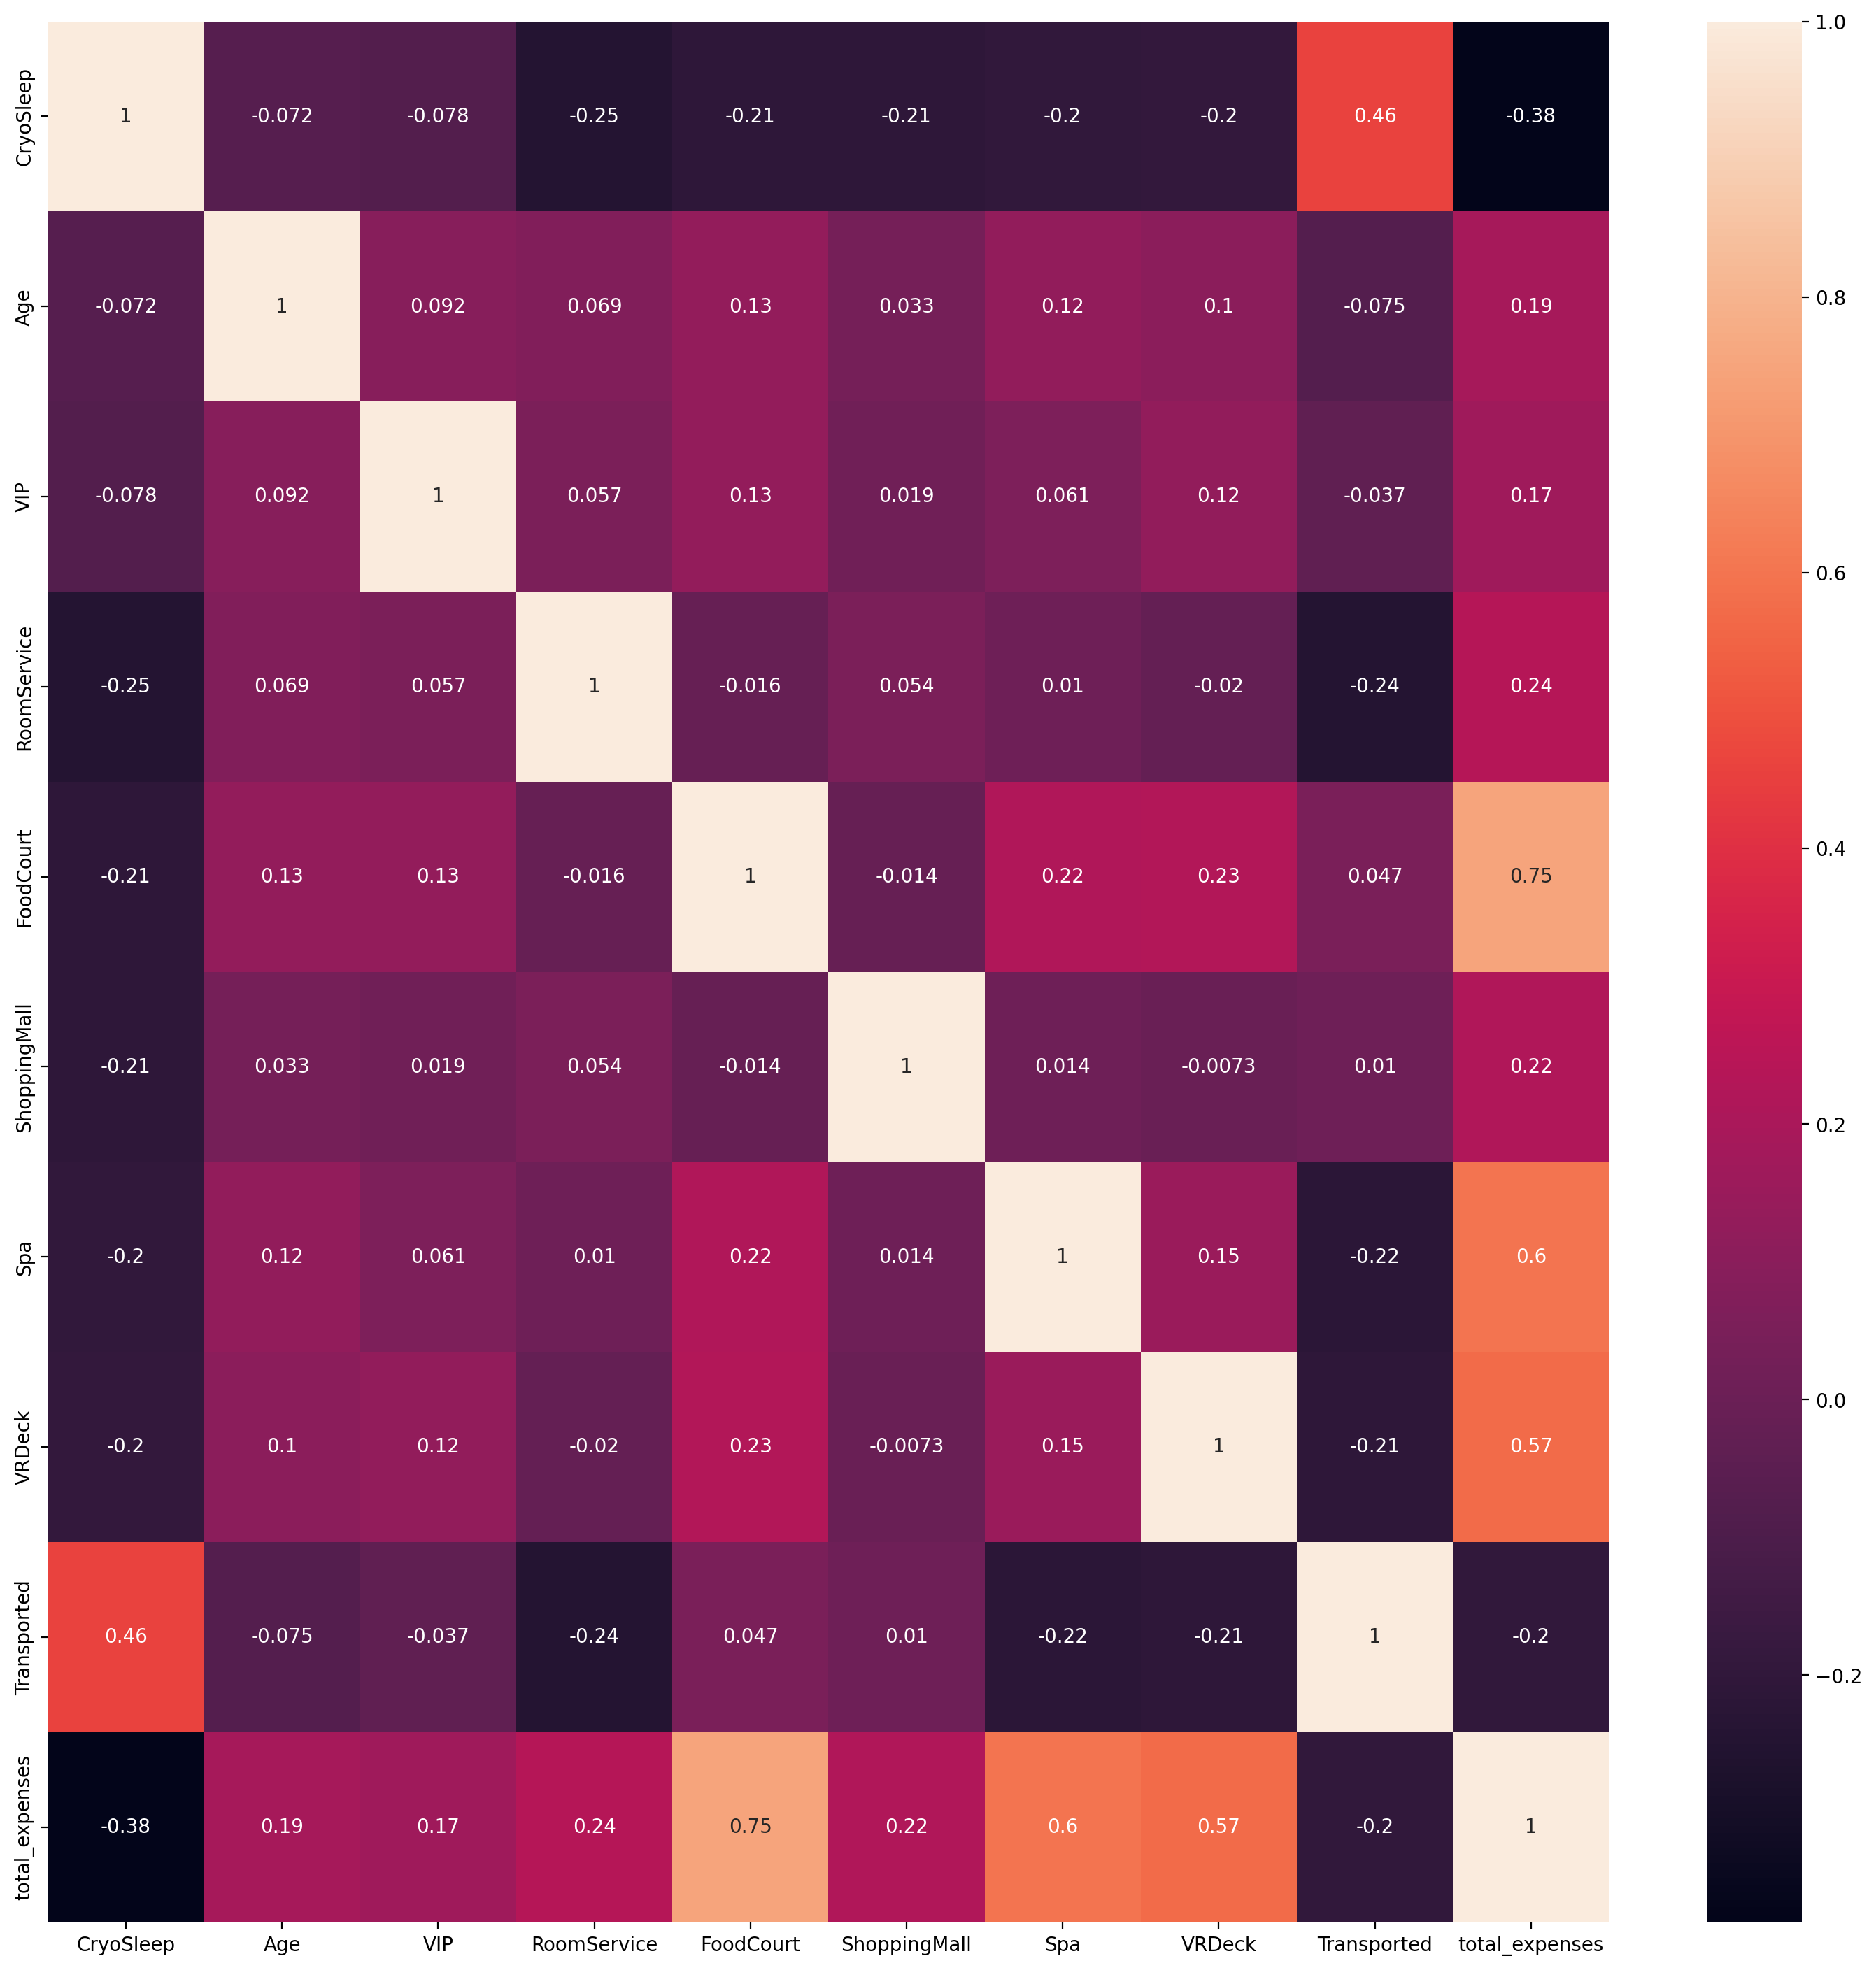

In [25]:
plt.figure(figsize=(18,18),dpi=200)
sns.heatmap(train_data.corr(), annot = True)

In [26]:
train_data[['deck', 'num', 'side']] = train_data.Cabin.str.split('/', expand = True)
test_data[['deck', 'num', 'side']] = train_data.Cabin.str.split('/', expand = True)

In [27]:
train_data.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,total_expenses,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,F,0,S


In [28]:
train_data.drop(['Name', 'Cabin'], axis=1, inplace=True)

In [29]:
test_data.drop(['Name', 'Cabin'], axis=1, inplace=True)

In [30]:
train_data.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Destination         0
Age               179
VIP                 0
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Transported         0
total_expenses    908
deck              199
num               199
side              199
dtype: int64

In [31]:
train_data.deck.fillna(train_data.deck.mode().iloc[0], inplace = True)
train_data.side.fillna(train_data.side.mode().iloc[0], inplace = True)
test_data.deck.fillna(test_data.deck.mode().iloc[0], inplace = True)
test_data.side.fillna(test_data.side.mode().iloc[0], inplace = True)

In [32]:
l1 = list(train_data.select_dtypes(float).columns)

In [33]:
train_data.Destination.value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [34]:
# fig,ax = plt.subplots(2,figsize = (8,12))
# sns.countplot(x = df_train[df_train.Destination == 'TRAPPIST-1e']['Transported'],ax = ax)

In [35]:
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [36]:
# num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),('std_scaler',StandardScaler())])

In [37]:
# pipe = ColumnTransformer([('num',num_pipeline,['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']),
#                           ('ohe',OneHotEncoder(),['HomePlanet','CryoSleep','Destination','VIP','Transported'])])

In [38]:
# df_train_transform = pipe.fit_transform(df_train)

In [39]:
# df_train_transform = pd.DataFrame(df_train_transform)

In [40]:
# df_train_transform.head(0)

In [41]:
# df_train_transform = df_train_transform.drop([10,15,17],axis=1)

In [42]:
# df_train_transform.head(0)

In [43]:
imputer = SimpleImputer(strategy='median')
train_data[l1] = imputer.fit_transform(train_data[l1])

In [44]:
test_data[l1] = imputer.fit_transform(test_data[l1])

In [45]:
c1 = list(train_data.select_dtypes(object).columns)
c2 = list(train_data.select_dtypes(bool).columns)

In [46]:
ohe_encoder = OneHotEncoder(sparse=False)

In [47]:
train_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_expenses,deck,num,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,B,0,P


In [48]:
train_data.CryoSleep = train_data.CryoSleep.apply(lambda x: 1 if x is True else 0)
test_data.CryoSleep = test_data.CryoSleep.apply(lambda x: 1 if x is True else 0)
train_data.VIP = train_data.VIP.apply(lambda x: 1 if x is True else 0)
test_data.VIP = test_data.VIP.apply(lambda x: 1 if x is True else 0)
train_data.Transported = train_data.Transported.apply(lambda x: 1 if x is True else 0)

In [49]:
trans = ohe_encoder.fit_transform(train_data[['HomePlanet', 'Destination', 'side']])

In [50]:
l = list(ohe_encoder.categories_[0]) + list(ohe_encoder.categories_[1]) + list(ohe_encoder.categories_[2])
df1 = pd.DataFrame(trans,columns=l)
train_data = pd.concat([train_data, df1], axis=1)

In [51]:
trans = ohe_encoder.transform(test_data[['HomePlanet', 'Destination', 'side']])

In [52]:
l = list(ohe_encoder.categories_[0]) + list(ohe_encoder.categories_[1]) + list(ohe_encoder.categories_[2])
df1 = pd.DataFrame(trans,columns=l)
test_data = pd.concat([test_data, df1], axis=1)

In [53]:
train_data.deck.value_counts()

F    2993
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: deck, dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['deck'] = le.fit_transform(train_data['deck'])
test_data['deck'] = le.fit_transform(test_data['deck'])

In [55]:
train_data.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Transported         0
total_expenses      0
deck                0
num               199
side                0
Earth               0
Europa              0
Mars                0
55 Cancri e         0
PSO J318.5-22       0
TRAPPIST-1e         0
P                   0
S                   0
dtype: int64

In [56]:
train_data.num.fillna(train_data.num.mode().iloc[0], inplace = True)

In [57]:
test_data.num.fillna(test_data.num.mode().iloc[0], inplace = True)

In [58]:
test_data.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
total_expenses    0
deck              0
num               0
side              0
Earth             0
Europa            0
Mars              0
55 Cancri e       0
PSO J318.5-22     0
TRAPPIST-1e       0
P                 0
S                 0
dtype: int64

In [59]:
train_data.head(0)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,num,side,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,P,S


In [60]:
train_data.drop(['HomePlanet', 'Destination', 'side', 'deck'], axis=1, inplace=True)
test_data.drop(['HomePlanet', 'Destination', 'side', 'deck'], axis=1, inplace=True)

In [61]:
train_data.head(0)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_expenses,num,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,P,S


In [62]:
train_data.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_expenses,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,P,S
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.349362,28.790291,0.022892,220.009318,448.434027,169.572300,304.588865,298.261820,0.503624,1406.408720,0.552514,0.245140,0.202347,0.207063,0.091568,0.701369,0.483838,0.516162
std,0.476796,14.341404,0.149568,660.519050,1595.790627,598.007164,1125.562559,1134.126417,0.500016,2702.293063,0.497263,0.430195,0.401772,0.405224,0.288432,0.457684,0.499767,0.499767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,736.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,37.000000,0.000000,41.000000,61.000000,22.000000,53.000000,40.000000,1.000000,1299.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,35987.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
# df1 = df_train.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],axis = 1)

In [64]:
X_train = train_data.drop(['PassengerId', 'Transported'], axis=1)
y_train = train_data.Transported

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [66]:
# cross_val_score(LogisticRegression(max_iter=500),X_train,y_train,cv = 3)

In [67]:
# cross_val_score(SVC(),X_train,y_train,cv = 3)

In [68]:
cross_val_score(DecisionTreeClassifier(),X_train,y_train,cv=3)

array([0.68081435, 0.72360248, 0.73800483])

In [69]:
cross_val_score(RandomForestClassifier(),X_train,y_train,cv=3)

array([0.73775017, 0.79503106, 0.78805661])

In [70]:
models = [LogisticRegression(),SVC(),DecisionTreeClassifier()]
parameter = {'Logistic Regression' : {'C' : [5,8,10,20,50],'solver' :['liblinear','lbfgs']},
             "SVM": {'kernel':['rbf','poly','linear'],"degree":[1,2,3],'C':[20,50,70,100]},
             'Decision Tree': {'max_depth':[3,5,6,8,10],'min_samples_split':[10,30,50,80,100,120]}}

In [ ]:
for model,(key,value) in zip(models,parameter.items()):
    grid_model = GridSearchCV(model,param_grid=value,cv=3)
    grid_model.fit(X_train,y_train)
    print(f'Best parameters for {key} is {grid_model.best_params_}')

C:\Users\91737\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91737\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best parameters for Logistic Regression is {'C': 10, 'solver': 'lbfgs'}


In [ ]:
# cross_val_score(LogisticRegression(C=20,solver='liblinear'),X_train,y_train,cv = 3)

In [ ]:
# cross_val_score(DecisionTreeClassifier(max_depth=8,min_samples_split=30),X_train,y_train,cv=3)

In [ ]:
# cross_val_score(SVC(C=20),X_train,y_train,cv = 3)

In [ ]:
# from sklearn.ensemble import VotingClassifier

In [ ]:
# svm_clf = SVC(C=20)
# log_clf = LogisticRegression(C=20,solver='liblinear')
# dct_clf = DecisionTreeClassifier(max_depth=8,min_samples_split=30)

In [ ]:
# voting_clf = VotingClassifier([('lr_clf',log_clf),('dt_clf',dct_clf),('svc',svm_clf)],voting='hard')
# voting_clf.fit(X_train,y_train)

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

In [ ]:
test_data.head(2)

In [ ]:
test_data.info()

In [ ]:
test_data.isna().sum()

In [ ]:
# y_pred = voting_clf.predict(df_test)

In [ ]:
y_pred_rf = rf_clf.predict(test_data.drop('PassengerId', axis=1))

In [ ]:
# df_voting = pd.DataFrame(pd.concat([pd.Series(df_test.PassengerId),pd.Series(y_pred)],axis=1))
# df_voting.rename(columns={0:'Transported'},inplace=True)

In [ ]:
df_rf = pd.DataFrame(pd.concat([pd.Series(test_data.PassengerId), pd.Series(y_pred_rf)], axis=1))
df_rf.rename(columns={0:'Transported'},inplace=True)

In [ ]:
def integer_to_bool(data):
    if data == 1:
        return True
    else:
        return False

In [ ]:
df_rf.Transported = df_rf.Transported.apply(integer_to_bool)

In [362]:
df_rf.head(2)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False


In [363]:
df_rf.to_csv(r'D:\Datasets\SpaceShip\submission_rf.csv',index=False)